# Task 1 - Iris flowers classification ML project

In [62]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")


In [63]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [81]:
inp0 = pd.read_csv("Iris.csv")

In [82]:
inp0

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
inp0.shape

(150, 6)

In [67]:
inp0.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
inp0.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [69]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [70]:
inp0.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [71]:
inp0.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [83]:
inp0.drop(['Id' , 'Species'] , axis = 1 , inplace = True)

In [84]:
inp0.duplicated().sum()

3

In [85]:
inp0.drop_duplicates(inplace=True)

In [86]:
inp0.duplicated().sum()

0

In [87]:
inp0

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


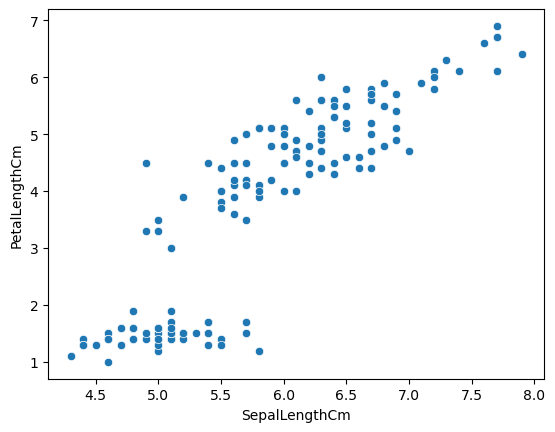

In [88]:
sns.scatterplot(data=inp0,x="SepalLengthCm" ,y="PetalLengthCm")
plt.show()

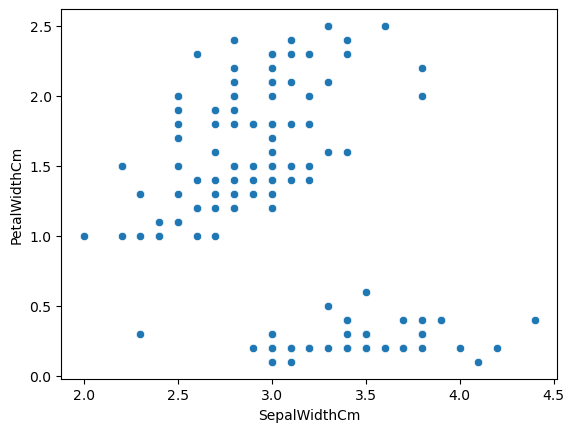

In [89]:
sns.scatterplot(data=inp0,x="SepalWidthCm" ,y="PetalWidthCm")
plt.show()

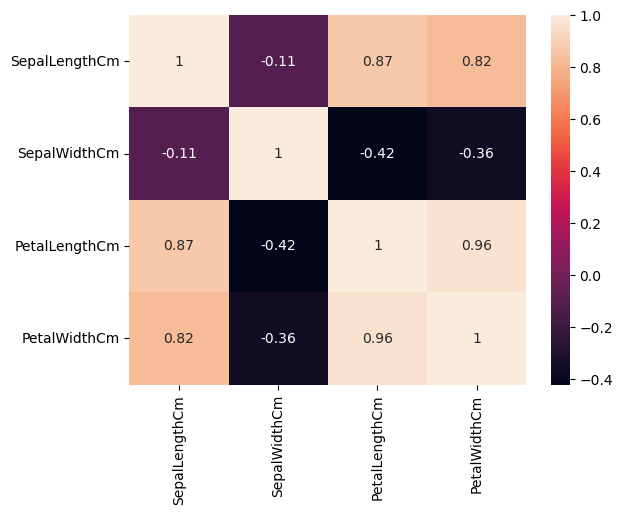

In [90]:
sns.heatmap(inp0.corr() , annot=True)
plt.show()

In [91]:
scup =[]

for i in range(1,11):
    Kmeans=KMeans(n_clusters=i ,random_state=40, max_iter = 300 , n_init = 10 )
    Kmeans.fit(inp0.values)
    scup.append(Kmeans.inertia_)

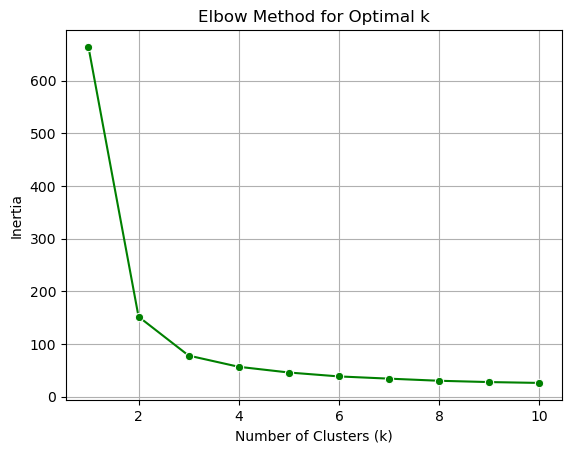

In [106]:
sns.lineplot(x= range(1,11), y=scup, marker='o', linestyle='-', color='g')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [94]:
Kmeans=KMeans(n_clusters=3 ,random_state=0, max_iter = 300 , n_init = 10 )

In [97]:
y_kmeans = kmeans.fit_predict(inp0.values)

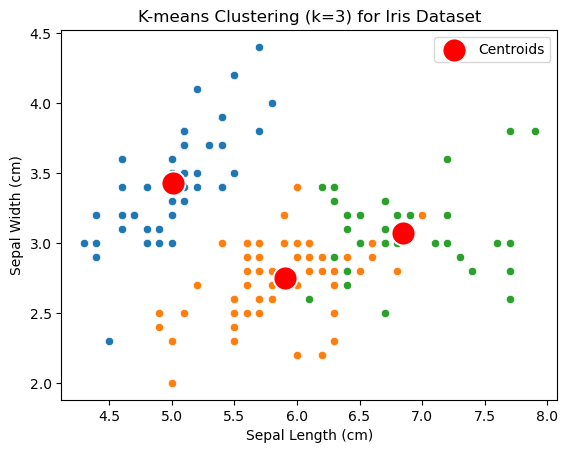

In [103]:
sns.scatterplot(x = inp0.values[y_kmeans == 0, 0] , y = inp0.values[y_kmeans == 0, 1],markers = '-')
sns.scatterplot(x = inp0.values[y_kmeans == 1, 0] , y = inp0.values[y_kmeans == 1, 1])
sns.scatterplot(x = inp0.values[y_kmeans == 2, 0] , y = inp0.values[y_kmeans == 2, 1])
sns.scatterplot(x = kmeans.cluster_centers_[:, 0] , y = kmeans.cluster_centers_[:,1],label='Centroids' ,c="red",s=300)
plt.title('K-means Clustering (k=3) for Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()
     